## 스타벅스 지역별 지점수 분석
1. 지역별/지점 위치에 따른 데이터 수집(교재 234 ~ 247page 참조)
2. 수집 데이터에 대한 분석을 위한 전처리
3. 지역별 분석 및 시각화

#### 1. 지역별 지점 위치 정보 수집
1. 데이터 수집을 위한 url 확인
2. 수집 방법을 선택(기획, 기술)-selenium을 사용해 직접 사이트 제어
3. 데이터 수집 및 저장(csv)

In [1]:
# 모듈 연결
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
import time
import pandas as pd

In [ ]:
# !pip install selenium

In [12]:
browser = Chrome("./chromedriver")
url="https://www.starbucks.co.kr/store/store_map.do"
browser.get(url)

In [13]:
# [지역 검색] 클릭
browser.find_element(By.XPATH,
                     '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(1)

# [서울] 메뉴 클릭
browser.find_element(By.XPATH, 
                     '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(1)

# [전체] 메뉴 클릭
browser.find_element(By.XPATH, 
                     '//*[@id="mCSB_2_container"]/ul/li[1]/a').click()
time.sleep(1)

In [14]:
html = browser.page_source
soup = bs(html, "html.parser")

In [15]:
lstcon_soup = soup.find('ul', class_="quickSearchResultBoxSidoGugun")
addr_soup = lstcon_soup.find_all("li", class_="quickResultLstCon")

print(len(addr_soup))
print(addr_soup[0].find('strong').get_text())
print(addr_soup[0].find('p').get_text()[:-9])
print(addr_soup[0].find('p').get_text().replace("1522-3232", ""))
print(addr_soup[0]["data-lat"])
print(addr_soup[0]["data-long"])

574
역삼아레나빌딩  
서울특별시 강남구 언주로 425 (역삼동)
서울특별시 강남구 언주로 425 (역삼동)
37.501087
127.043069


[먼저 작업해 보세요]
- 서울 전체 지점명과 주소, 위도, 경도를 가져와 DataFrame로 출력하세요.
- DataFrame은 csv 형식의 파일로 저장하세요

In [17]:
from tqdm import tqdm
lstcon_soup = soup.find('ul', class_="quickSearchResultBoxSidoGugun")
addr_soup = lstcon_soup.find_all("li", class_="quickResultLstCon")

addr_lst = []

for addr in tqdm(addr_soup):
    branch = addr.find('strong').get_text()
    addrs = addr.find('p').get_text()[:-9]
    lat = addr['data-lat']
    long = addr['data-long']
    
    addr_lst.append({"지점명":branch, "주소":addrs,
                     "위도":lat, "경도":long})
    
df = pd.DataFrame(addr_lst)
df

100%|██████████████████████████████████████| 574/574 [00:00<00:00, 24475.73it/s]


,지점명,주소,위도,경도
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),37.501087,127.043069
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),37.510178,127.022223
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),37.514132,127.020563
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),37.499517,127.031495
4,대치재경빌딩R,서울특별시 강남구 남부순환로 2947 (대치동),37.494668,127.062583
...,...,...,...,...
569,사가정역,서울특별시 중랑구 면목로 310,37.579594,127.087966
570,상봉역,서울특별시 중랑구 망우로 307 (상봉동),37.59689,127.08647
571,묵동,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",37.615368,127.076633
572,중화역,"서울특별시 중랑구 봉화산로 35 1,2층",37.60170912407773,127.07841136432036


In [18]:
df.to_csv("./스타벅스_서울.csv")  # 절대경로
# df.to_csv("../data/스타벅스_서울.csv")     # 상대경로

### 경기도 지역별/지점별 정보 수십

In [19]:
# [지역 검색] 클릭
browser.find_element(By.XPATH,
                     '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(1)

# [경기] 메뉴 클릭
browser.find_element(By.XPATH, 
                     '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[2]/a').click()
time.sleep(1)

# [전체] 메뉴 클릭
browser.find_element(By.XPATH, 
                     '//*[@id="mCSB_2_container"]/ul/li[1]/a').click()
time.sleep(1)

In [20]:
html = browser.page_source
soup = bs(html, "html.parser")

from tqdm import tqdm
lstcon_soup = soup.find('ul', class_="quickSearchResultBoxSidoGugun")
addr_soup = lstcon_soup.find_all("li", class_="quickResultLstCon")

addr_lst = []

for addr in tqdm(addr_soup):
    branch = addr.find('strong').get_text()
    addrs = addr.find('p').get_text()[:-9]
    lat = addr['data-lat']
    long = addr['data-long']
    
    addr_lst.append({"지점명":branch, "주소":addrs,
                     "위도":lat, "경도":long})
    
df = pd.DataFrame(addr_lst)
df.to_csv('./스타벅스_경기.csv')
df

100%|██████████████████████████████████████| 385/385 [00:00<00:00, 25735.62it/s]


,지점명,주소,위도,경도
0,남이섬,경기도 가평군 가평읍 북한강변로 1054 북한강변로 1054,37.806624,127.52527
1,소노캄고양,경기도 고양시 일산동구 태극로 18 (장항동),37.6618,126.7507
2,일산애니골DT,경기도 고양시 일산동구 무궁화로 294 (풍동),37.6748,126.793181
3,동국대일산병원,경기도 고양시 일산동구 동국로 27 (식사동),37.676411,126.806405
4,일산풍동DT,경기도 고양시 일산동구 백마로 475 (풍동),37.662091,126.800900
...,...,...,...,...
380,파주산내,경기도 파주시 청암로17번길 29 (목동동),37.728707,126.735514
381,파주야당DT,경기도 파주시 경의로 966 (야당동),37.70346,126.75964
382,파주운정이마트,경기도 파주시 한울로 123 (동패동),37.710647,126.74545
383,지행역,경기도 동두천시 지행로 55 (지행동),37.892653,127.053463


### [미션] 전국에 있는 스타벅스 위치를 크롤링 하세요
- 저장: 스타벅스_전국.csv

In [2]:
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
import time
import pandas as pd
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

In [3]:
def local_click(num=1):
    browser.find_element(By.XPATH,
                         '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
    time.sleep(1)

    # [지역] 메뉴 클릭
    path_val='//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[' + str(num) + ']/a'
    browser.find_element(By.XPATH, path_val).click()
    time.sleep(1)

    # [전체] 메뉴 클릭
    try:
        browser.find_element(By.XPATH,'//*[@id="mCSB_2_container"]/ul/li[1]/a').click()
        time.sleep(1)
    except:
        pass

In [4]:
def branchaddr():
    html = browser.page_source
    soup = bs(html, "html.parser")

    lstcon_soup = soup.find('ul', class_="quickSearchResultBoxSidoGugun")
    addr_soup = lstcon_soup.find_all("li", class_="quickResultLstCon")

    addr_lst = []

    for addr in addr_soup:
        branch = addr.find('strong').get_text()
        addrs = addr.find('p').get_text()[:-9]
        lat = addr['data-lat']
        long = addr['data-long']

        addr_lst.append({"지점명":branch, "주소":addrs,
                         "위도":lat, "경도":long})

    df = pd.DataFrame(addr_lst)
    return df

In [25]:
browser = Chrome("./chromedriver")
url="https://www.starbucks.co.kr/store/store_map.do"
browser.get(url)

star_df=pd.DataFrame()

for i in range(1, 18):
    local_click(i)
    df_branch=branchaddr()
    star_df=pd.concat([star_df, df_branch])
    
browser.close()

star_df=star_df.reset_index(drop=True)
star_df.to_csv("./스타벅스_전국.csv")
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지점명     1665 non-null   object
 1   주소      1665 non-null   object
 2   위도      1665 non-null   object
 3   경도      1665 non-null   object
dtypes: object(4)
memory usage: 52.2+ KB


#### 함수 없이 진행

In [5]:
browser = Chrome("./chromedriver")
url="https://www.starbucks.co.kr/store/store_map.do"
browser.get(url)

addr_lst = []

for i in tqdm(range(1, 18)):
    # 지역/시도/전체 선택
    browser.find_element(By.XPATH,
                         '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
    time.sleep(1)

    # [지역] 메뉴 클릭
    path_val='//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[' + str(i) + ']/a'
    browser.find_element(By.XPATH, path_val).click()
    time.sleep(1)

    # [전체] 메뉴 클릭
    try:
        browser.find_element(By.XPATH,'//*[@id="mCSB_2_container"]/ul/li[1]/a').click()
        time.sleep(1)
    except:
        pass
    
    # 화면에 나타난 스터벅스 지점명/주소 등 추출
    html = browser.page_source
    soup = bs(html, "html.parser")

    lstcon_soup = soup.find('ul', class_="quickSearchResultBoxSidoGugun")
    addr_soup = lstcon_soup.find_all("li", class_="quickResultLstCon")

    for addr in addr_soup:
        branch = addr.find('strong').get_text()
        addrs = addr.find('p').get_text()[:-9]
        lat = addr['data-lat']
        long = addr['data-long']

        addr_lst.append({"지점명":branch, "주소":addrs,
                         "위도":lat, "경도":long})
    
browser.close()

star_df=pd.DataFrame(addr_lst)
star_df.to_csv("./스타벅스_전국.csv")
star_df.info()


100%|██████████| 17/17 [00:57<00:00,  3.36s/it]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지점명     1684 non-null   object
 1   주소      1684 non-null   object
 2   위도      1684 non-null   object
 3   경도      1684 non-null   object
dtypes: object(4)
memory usage: 52.8+ KB


In [6]:
star_df

,지점명,주소,위도,경도
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),37.501087,127.043069
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),37.510178,127.022223
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),37.514132,127.020563
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),37.499517,127.031495
4,대치재경빌딩R,서울특별시 강남구 남부순환로 2947 (대치동),37.494668,127.062583
...,...,...,...,...
1679,세종이마트,세종특별자치시 금송로 687(가람동 406) 이마트 세종점,36.4712189,127.2509973
1680,세종청사,세종특별자치시 도움8로 81 (어진동),36.504565,127.270769
1681,세종아름,"세종특별자치시 아름서1길 13-9 (아름동) 103,104,105,202,203호",36.51188,127.24277
1682,세종소담,"세종특별자치시 소담3로 8 (소담동) 1동 12호,13호,14호,15호,15a호,16호",36.485755,127.300509


#### 시도 열 추가
- 주소에서 첫번째 단어를 이용해 열 추가

In [7]:
# 시도 필드 추가
#star_df.iloc[-1, 1].split(" ")[0]
#star_df.loc[1000, "주소"].split(" ")[0]

sido = []

for i in star_df.index:
    sido.append(star_df.loc[i, "주소"].split(" ")[0])
    
star_df["시도"] = sido

In [8]:
# 시도 필드 추가(한줄쓰기)

In [9]:
star_df["시도"]=[ star_df.loc[i,"주소"].split(" ")[0] for i in star_df.index ]
star_df

,지점명,주소,위도,경도,시도
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),37.501087,127.043069,서울특별시
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),37.510178,127.022223,서울특별시
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),37.514132,127.020563,서울특별시
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),37.499517,127.031495,서울특별시
4,대치재경빌딩R,서울특별시 강남구 남부순환로 2947 (대치동),37.494668,127.062583,서울특별시
...,...,...,...,...,...
1679,세종이마트,세종특별자치시 금송로 687(가람동 406) 이마트 세종점,36.4712189,127.2509973,세종특별자치시
1680,세종청사,세종특별자치시 도움8로 81 (어진동),36.504565,127.270769,세종특별자치시
1681,세종아름,"세종특별자치시 아름서1길 13-9 (아름동) 103,104,105,202,203호",36.51188,127.24277,세종특별자치시
1682,세종소담,"세종특별자치시 소담3로 8 (소담동) 1동 12호,13호,14호,15호,15a호,16호",36.485755,127.300509,세종특별자치시


In [10]:
# 데이터 열 순서 변경
star_df=star_df[["지점명", '시도', '주소', "위도", "경도"]]
star_df

,지점명,시도,주소,위도,경도
0,역삼아레나빌딩,서울특별시,서울특별시 강남구 언주로 425 (역삼동),37.501087,127.043069
1,논현역사거리,서울특별시,서울특별시 강남구 강남대로 538 (논현동),37.510178,127.022223
2,신사역성일빌딩,서울특별시,서울특별시 강남구 강남대로 584 (논현동),37.514132,127.020563
3,국기원사거리,서울특별시,서울특별시 강남구 테헤란로 125 (역삼동),37.499517,127.031495
4,대치재경빌딩R,서울특별시,서울특별시 강남구 남부순환로 2947 (대치동),37.494668,127.062583
...,...,...,...,...,...
1679,세종이마트,세종특별자치시,세종특별자치시 금송로 687(가람동 406) 이마트 세종점,36.4712189,127.2509973
1680,세종청사,세종특별자치시,세종특별자치시 도움8로 81 (어진동),36.504565,127.270769
1681,세종아름,세종특별자치시,"세종특별자치시 아름서1길 13-9 (아름동) 103,104,105,202,203호",36.51188,127.24277
1682,세종소담,세종특별자치시,"세종특별자치시 소담3로 8 (소담동) 1동 12호,13호,14호,15호,15a호,16호",36.485755,127.300509


In [11]:
# 시도를 기준으로 영업점수 확인
star_sido=star_df.groupby('시도')[["지점명"]].count()
star_sido

,지점명
시도,
강원도,28
경기도,394
경상남도,67
경상북도,50
광주광역시,60
대구광역시,71
대전광역시,59
부산광역시,127
서울특별시,578


In [12]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

#font_path = "C:/Windows/Fonts/NGULIM.TTF"
#font = font_manager.FontProperties(fname=font_path).get_name()
#rc('font', family=font)

if platform.system() == "Darwin":  # 맥
    plt.rc('font', family='AppleGothic')
elif platform.system() == "Windows":  # 윈도우
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == "Linux":  # 리눅스 = 코랩
    plt.rc('font', family='Malgun Gothic')

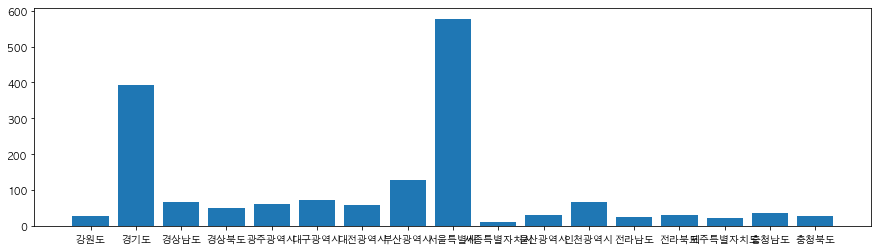

In [13]:
# 영업점수 막대차트 표시
plt.figure(figsize=(15, 4))
plt.bar(star_sido.index, star_sido['지점명'])
plt.show()

In [14]:
# 점포수를 기준으로 내람차순 정렬 후 차트로 표시
star_sido.sort_values(by="지점명", ascending=True)  # 오름차순
star_sido.sort_values(by="지점명", ascending=False)  # 내림차순

,지점명
시도,
서울특별시,578
경기도,394
부산광역시,127
대구광역시,71
경상남도,67
인천광역시,67
광주광역시,60
대전광역시,59
경상북도,50


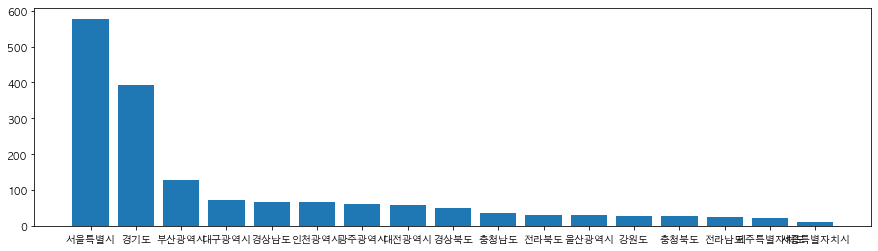

In [15]:
star_sido=star_sido.sort_values(by="지점명", ascending=False)

plt.figure(figsize=(15, 4))
plt.bar(star_sido.index, star_sido['지점명'])
plt.show()

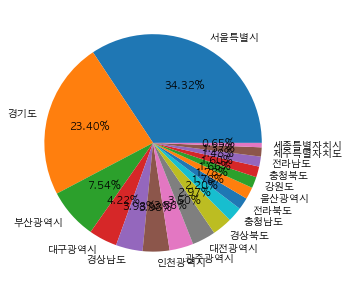

In [16]:
# 지역별 분포(원 차트)
plt.figure(figsize=(5, 5))
plt.pie(star_sido["지점명"], labels=star_sido.index, autopct='%.2f%%')
plt.show()

In [17]:
# 데이터 추출
star_df[star_df["시도"]=="서울특별시"]  # 서울특별시와 일치하는 값
star_df[star_df["시도"].str.contains("서울") ]  # 서울이 포함되어 있는 데이터

,지점명,시도,주소,위도,경도
0,역삼아레나빌딩,서울특별시,서울특별시 강남구 언주로 425 (역삼동),37.501087,127.043069
1,논현역사거리,서울특별시,서울특별시 강남구 강남대로 538 (논현동),37.510178,127.022223
2,신사역성일빌딩,서울특별시,서울특별시 강남구 강남대로 584 (논현동),37.514132,127.020563
3,국기원사거리,서울특별시,서울특별시 강남구 테헤란로 125 (역삼동),37.499517,127.031495
4,대치재경빌딩R,서울특별시,서울특별시 강남구 남부순환로 2947 (대치동),37.494668,127.062583
...,...,...,...,...,...
573,중랑구청,서울특별시,서울특별시 중랑구 신내로 72,37.60538908,127.0957558
574,사가정역,서울특별시,서울특별시 중랑구 면목로 310,37.579594,127.087966
575,상봉역,서울특별시,서울특별시 중랑구 망우로 307 (상봉동),37.59689,127.08647
576,묵동,서울특별시,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",37.615368,127.076633


#### 서울/경기 데이터에서 시군구를 기준으로 상위 10개의 데이터 추출

In [18]:

# df[((조건식1) & (조건식2)) | (조건식3)]

sigu_df=star_df[(star_df["시도"].str.contains("서울")) | 
                (star_df["시도"].str.contains("경기"))]

display(sigu_df.head(2))
display(sigu_df.tail(2))

,지점명,시도,주소,위도,경도
0,역삼아레나빌딩,서울특별시,서울특별시 강남구 언주로 425 (역삼동),37.501087,127.043069
1,논현역사거리,서울특별시,서울특별시 강남구 강남대로 538 (논현동),37.510178,127.022223


,지점명,시도,주소,위도,경도
970,지행역,경기도,경기도 동두천시 지행로 55 (지행동),37.892653,127.053463
971,동두천DT,경기도,경기도 동두천시 평화로 2254 (지행동),37.888925,127.057066


In [19]:
# 시군구 열 추가
sigu_df["시군구"]=[sigu_df.loc[i,"주소"].split(" ")[1] for i in sigu_df.index ]
sigu_df.head()

/var/folders/rt/5jvyxhl160n0wkcqnqvygf8m0000gn/T/ipykernel_31119/626094987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigu_df["시군구"]=[sigu_df.loc[i,"주소"].split(" ")[1] for i in sigu_df.index ]


,지점명,시도,주소,위도,경도,시군구
0,역삼아레나빌딩,서울특별시,서울특별시 강남구 언주로 425 (역삼동),37.501087,127.043069,강남구
1,논현역사거리,서울특별시,서울특별시 강남구 강남대로 538 (논현동),37.510178,127.022223,강남구
2,신사역성일빌딩,서울특별시,서울특별시 강남구 강남대로 584 (논현동),37.514132,127.020563,강남구
3,국기원사거리,서울특별시,서울특별시 강남구 테헤란로 125 (역삼동),37.499517,127.031495,강남구
4,대치재경빌딩R,서울특별시,서울특별시 강남구 남부순환로 2947 (대치동),37.494668,127.062583,강남구


In [20]:
sigu_df["시군구"].unique()

array(['강남구', '강북구', '강서구', '관악구', '광진구', '금천구', '노원구', '도봉구', '동작구',
       '마포구', '서대문구', '서초구', '성북구', '송파구', '양천구', '영등포구', '은평구', '종로구',
       '중구', '강동구', '구로구', '동대문구', '성동구', '용산구', '중랑구', '가평군', '고양시',
       '과천시', '광명시', '광주시', '구리시', '군포시', '남양주시', '성남시', '수원시', '시흥시',
       '안산시', '안성시', '안양시', '양주시', '오산시', '용인시', '의왕시', '의정부시', '이천시',
       '포천시', '하남시', '화성시', '여주시', '평택시', '김포시', '부천시', '양평군', '파주시',
       '동두천시'], dtype=object)

In [21]:
# 시군구 별로 영업점 수 확인
sigu_gropup=sigu_df.groupby('시군구')[["시도"]].count()
sigu_gropup.head()

,시도
시군구,
가평군,1
강남구,87
강동구,16
강북구,6
강서구,23


In [22]:
# 상위 10개의 데이터
sigu_t10=sigu_gropup.sort_values("시도", ascending=False).head(10)
sigu_b10=sigu_gropup.sort_values("시도", ascending=False).tail(10)

In [23]:
sigu_b10

,시도
시군구,
군포시,5
의왕시,4
여주시,4
안성시,4
도봉구,4
과천시,3
동두천시,2
양평군,2
포천시,1


### 스타벅스 영업점 위치 지도 표시

In [24]:
st_df=pd.read_csv("./스타벅스_전국.csv")
del st_df["Unnamed: 0"]

st_df=st_df.astype({"위도":float, "경도":float})
st_df.dtypes

지점명     object
주소      object
위도     float64
경도     float64
dtype: object

In [25]:
import folium
from folium.plugins import MarkerCluster

map_star=folium.Map(location=[36.9912538, 127.9257914], zoon_start=11)
marker_cluster = MarkerCluster().add_to(map_star)

for lat, long in zip(st_df.위도, st_df.경도):
    folium.Marker([lat, long], 
                 icon=folium.Icon(color="green")).add_to(marker_cluster)

#map_star.save("./data/starbucks_map.html")
map_star   